In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import tensorflow.keras.layers as tfl
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
import os
import cv2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !unrar x "/content/dataset.rar" "/content/"

In [ ]:
IMGSIZE=224

In [ ]:
TrainData = image_dataset_from_directory(
    r"/content/drive/MyDrive/vision/final_data/images/train",
    shuffle=True,
    batch_size=28,
    image_size=(IMGSIZE, IMGSIZE),
    seed=123,
)

Found 1162 files belonging to 5 classes.


In [ ]:
ValidData = image_dataset_from_directory(
    r"/content/drive/MyDrive/Vision/dataset/classification/val",
    shuffle=True,
    batch_size=28,
    image_size=(IMGSIZE, IMGSIZE),
    seed=123,
)

Found 308 files belonging to 5 classes.


In [ ]:
classnames = TrainData.class_names
classnames

['Jelly', 'fish', 'shark', 'tuna', 'whale']

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

def data_augmenter():
    data_augmentation = tf.keras.Sequential()
    data_augmentation.add(preprocessing.RandomFlip('horizontal'))
    data_augmentation.add(preprocessing.RandomRotation(0.2))
    data_augmentation.add(preprocessing.RandomContrast(0.2))

    return data_augmentation
data_augmentation = data_augmenter()


In [ ]:
model7 = Sequential()


base_pretrainedmodel= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(IMGSIZE,IMGSIZE,3),
                   pooling='avg',classes=5,
                   weights='imagenet')

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
for layer in base_pretrainedmodel.layers:
        layer.trainable=False

model7.add(base_pretrainedmodel)

In [ ]:
from tensorflow.keras.layers import  Flatten , Dense , Dropout
model7.add(Flatten())
model7.add(Dense(512, activation='relu'))
model7.add(Dropout(0.5))
model7.add(Dense(100, activation='softmax'))

model7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               51300     
                                                                 
Total params: 24688100 (94.18 MB)
Trainable params: 1100388 (4.20 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
model7.compile(optimizer=Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
inputs = base_pretrainedmodel.input
x = data_augmentation(inputs)
x = base_pretrainedmodel.output


x = Dropout(0.5)(x)
output = Dense(5, activation='softmax')(x)

model4 = Model(inputs=inputs, outputs=output)


In [ ]:
base_pretrainedmodel.trainable = True

for layer in base_pretrainedmodel.layers:
  layer.trainable = True


for layer in base_pretrainedmodel.layers[:100]:
    layer.trainable = False


In [ ]:
model7.compile(
    optimizer='rmsprop',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
batch_size = 32


history7 = model7.fit(
    TrainData,
    epochs=10,
    validation_data=ValidData,
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


42/42 [==============================] - 282s 5s/step - loss: 1.1526 - accuracy: 0.7806 - val_loss: 18.0816 - val_accuracy: 0.5552
Epoch 2/10
42/42 [==============================] - 10s 214ms/step - loss: 0.4112 - accuracy: 0.8795 - val_loss: 10.2220 - val_accuracy: 0.4123
Epoch 3/10
42/42 [==============================] - 9s 212ms/step - loss: 0.1686 - accuracy: 0.9432 - val_loss: 4.4964 - val_accuracy: 0.7468
Epoch 4/10
42/42 [==============================] - 8s 182ms/step - loss: 0.1170 - accuracy: 0.9733 - val_loss: 31.2281 - val_accuracy: 0.5422
Epoch 5/10
42/42 [==============================] - 9s 193ms/step - loss: 0.1497 - accuracy: 0.9673 - val_loss: 2.3153 - val_accuracy: 0.8442
Epoch 6/10
42/42 [==============================] - 8s 192ms/step - loss: 0.0318 - accuracy: 0.9880 - val_loss: 1.0504 - val_accuracy: 0.8929
Epoch 7/10
42/42 [==============================] - 9s 190ms/step - loss: 0.0412 - accuracy: 0.9871 - val_loss: 3.3892 - val_accuracy: 0.7922
Epoch 8/10
42/

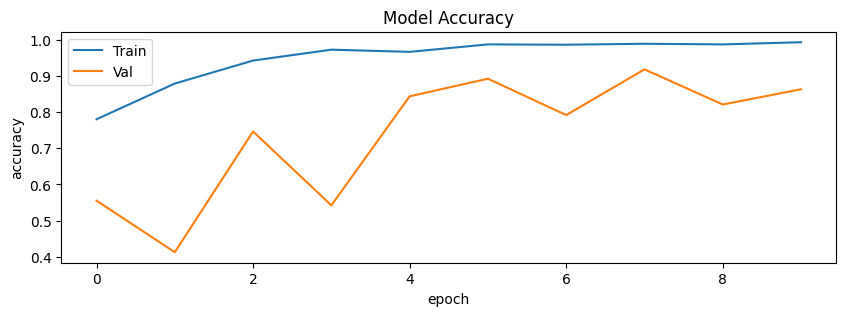

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 33ms/step


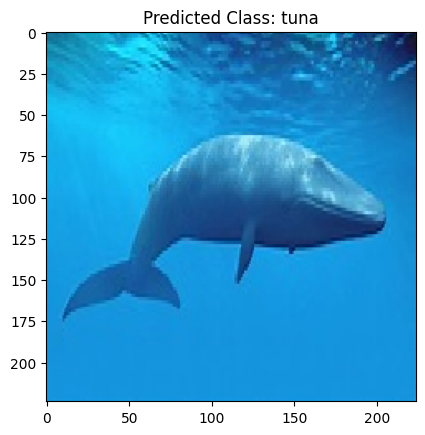

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input

test_image_path = '/content/whale-test.jpeg'
test_image = load_img(test_image_path, target_size=(IMGSIZE, IMGSIZE))
test_image_array = img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)
test_image_array = preprocess_input(test_image_array)

predictions = model7.predict(test_image_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class_name = classnames[predicted_class_index]

plt.imshow(test_image)
plt.title(f'Predicted Class: {predicted_class_name}')
plt.show()

**Detection**

In [ ]:
import torch # YOLOv5 implemented using pytorch
from IPython.display import Image #this is to render predictions

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16111, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 16111 (delta 6), reused 9 (delta 1), pack-reused 16089
Receiving objects: 100% (16111/16111), 14.85 MiB | 4.56 MiB/s, done.
Resolving deltas: 100% (11029/11029), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.5/660.5 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency 

In [ ]:
TrainData = image_dataset_from_directory(
    r"/content/drive/MyDrive/Vision/final_data/images/train",
    shuffle=True,
    batch_size=16,
    image_size=(416, 416),
    seed=123,
)

Found 702 files belonging to 4 classes.


In [ ]:
validData = image_dataset_from_directory(
    r"/content/drive/MyDrive/Vision/final_data/images/val",
    shuffle=True,
    batch_size=16,
    image_size=(416, 416),
    seed=123,
)

Found 151 files belonging to 4 classes.


In [ ]:
!python yolov5/train.py --img 416 --batch 16 --epochs 300 --data /content/drive/MyDrive/Vision/final_data/data.yaml --weights yolov5s.pt --cache

2023-12-19 20:38:01.772914: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 20:38:01.772967: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 20:38:01.774211: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/Vision/final_data/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimi

In [ ]:
!python yolov5/detect.py --source /content/drive/MyDrive/Vision/final_data/images/val/Jelly --weights yolov5/runs/train/exp5/weights/best.pt

detect: weights=['yolov5/runs/train/exp5/weights/best.pt'], source=/content/drive/MyDrive/Vision/final_data/images/val/Jelly, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-253-g63555c8 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/9 /content/drive/MyDrive/Vision/final_data/images/val/Jelly/v_100.jpg: 640x640 2 Jellys, 11.5ms
image 2/9 /content/drive/MyDrive/Vision/final_data/images/val/Jelly/v_101.jpg: 640x640 (no detections), 11.6ms
image 3/9 /content/drive/MyDrive/Vision/final_data/imag

**Segmentation**

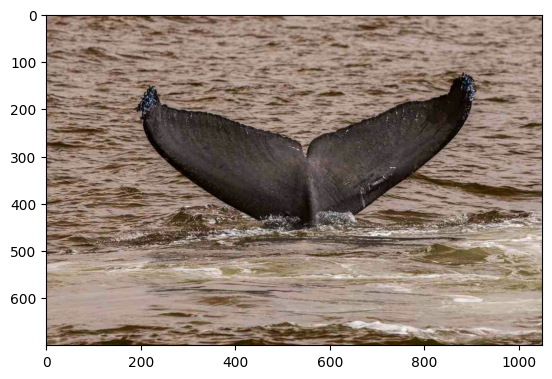

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input

test_image_path = '/content/813.jpg'
image = load_img(test_image_path)
image = cv2.imread(test_image_path)
plt.imshow(image)

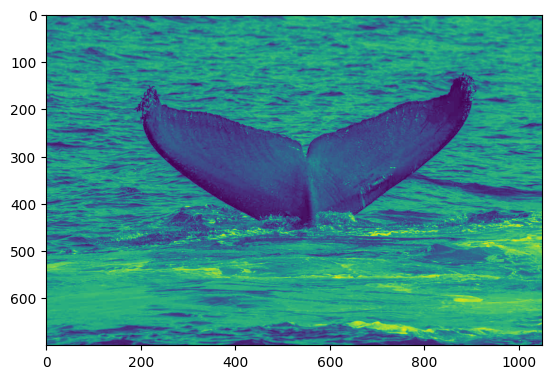

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [ ]:
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

In [ ]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [ ]:
largest_contour = max(contours, key=cv2.contourArea)


In [ ]:
mask = np.zeros_like(gray)
cv2.drawContours(mask, [largest_contour], 0, 255, thickness=cv2.FILLED)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

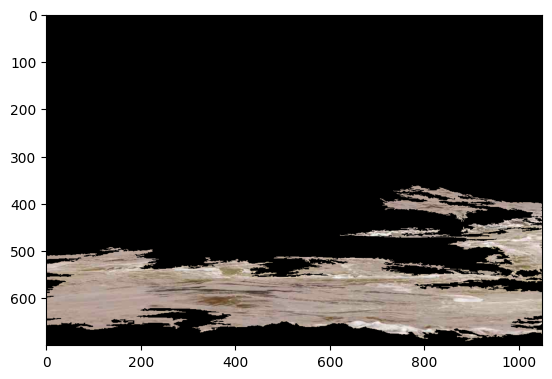

In [ ]:
segmented_image = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(segmented_image)

Calculated Threshold: 137.0
Image shape: (700, 1050, 3)
Segmented shape: (700, 1050, 3)


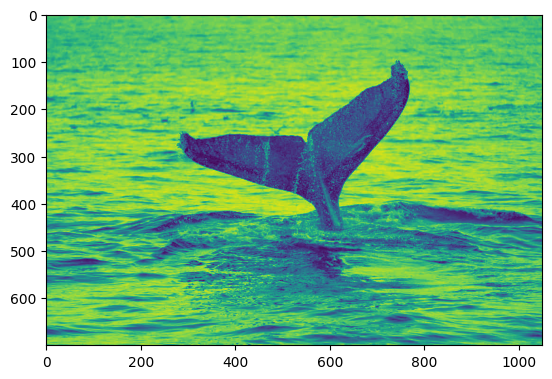

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input


# image = cv2.imread("/content/816.jpg", cv2.IMREAD_GRAYSCALE)

# # Apply Otsu's thresholding
# _, thresholded = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# # Display the original and thresholded images
# plt.imshow(thresholded)

# plt.imshow(image, cmap = "gray"), plt.axis("off")
# plt.show()


# # Print the calculated threshold value
print("Calculated Threshold:", _)



# edges = cv2.Canny(image, 30, 100)

# Assuming 'segmented' is the output mask from segmentation
# segmented = cv2.cvtColor(thresholded, cv2.COLOR_GRAY2BGR)
# segmented = cv2.resize(segmented, (image.shape[0], image.shape[1]))
# assert image.shape == segmented.shape


# result = cv2.addWeighted(image, 0.7, segmented, 0.3, 0)

# plt.imshow("Original vs Segmented", np.hstack([image, result]))




import cv2
import numpy as np

# Assuming 'segmented' is the output mask from segmentation
image = cv2.imread("/content/816.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresholded = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


segmented = cv2.cvtColor(thresholded, cv2.COLOR_GRAY2BGR)  # Convert to 3 channels for compatibility

# Resize the segmented image to match the size of the original image
segmented = cv2.resize(segmented, (image.shape[1], image.shape[0]))

# Print the shapes of the images for debugging
print("Image shape:", image.shape)
print("Segmented shape:", segmented.shape)

# Ensure that both images have the same dimensions
assert image.shape == segmented.shape, "Images must have the same dimensions"

# Blend the images using addWeighted
result = cv2.addWeighted(image, 0.7, segmented, 0.3, 0)

# Display the original image, segmented image, and the result
# plt.imshow(image)
plt.imshow(segmented)
# plt.imshow(result)






In [ ]:
import cv2
image = cv2.imread("816.jpg", cv2.IMREAD_GRAYSCALE)
_, binary_mask = cv2.threshold(image, threshold_value, max_value, cv2.THRESH_BINARY)


NameError: ignored